In [147]:
import scanpy as sc
import omicverse as ov
import numpy as np
import pandas as pd

In [198]:
rawdata_path = '/storage/zengjianyangLab/hulei/GBM/Raw_Data/14samples/'

adata_raw = sc.read_h5ad(os.path.join(rawdata_path,filename.split('.')[0].split('_')[0]+'.h5'))
adata_raw.obs_names = [x+'_'+filename.split('.')[0].split('_')[0] for x in adata_raw.obs_names]
adata_raw

AnnData object with n_obs × n_vars = 32052 × 28925
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'x', 'y', 'nCount_SCT', 'nFeature_SCT', 'first_type', 'B.cells', 'Endothelial', 'Macrophages', 'Microglial', 'Monocytes', 'Mural.cells', 'NK.cells', 'oligodenrocytes', 'OPCs', 'Other.Malignant', 'T'
    var: 'name'

In [201]:
import os
import scanpy as sc

# 指定包含.h5ad文件的文件夹路径
folder_path = '/storage/zengjianyangLab/hulei/GBM/Process_data/Spatial_cut/'
rawdata_path = '/storage/zengjianyangLab/hulei/GBM/Raw_Data/14samples/'
Batch_list = []
section_ids = []
# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    if filename.endswith('.h5ad'):
        # 使用sc.read_h5ad读取.h5ad文件
        full_path = os.path.join(folder_path, filename)
        adata = sc.read_h5ad(full_path)
        adata.obs_names = [x+'_'+filename.split('.')[0].split('_')[0] for x in adata.obs_names]
        adata_raw = sc.read_h5ad(os.path.join(rawdata_path,filename.split('.')[0].split('_')[0]+'.h5'))
        adata_raw.obs_names = [x+'_'+filename.split('.')[0].split('_')[0] for x in adata_raw.obs_names]
        adata.X = adata_raw[adata.obs_names,adata.var_names].X
        section_ids.append(filename.split('.')[0])
        # 现在可以在adata上执行任何分析或操作
        print(f'Read {filename}')
        Batch_list.append(adata)
adata_concat = ad.concat(Batch_list, label="slice_name", keys=section_ids)
adata_concat

Read LZT_CUT1.h5ad
Read LA_CUT2.h5ad
Read LSN_CUT1.h5ad
Read ZJC_CUT1.h5ad
Read LYZ_CUT2.h5ad
Read LWH_CUT2.h5ad
Read WXF_CUT1.h5ad
Read LWH_CUT1.h5ad
Read ZJC_CUT2.h5ad
Read LYZ_CUT1.h5ad
Read LA_CUT1.h5ad
Read LSN_CUT2.h5ad


AnnData object with n_obs × n_vars = 102372 × 26725
    obs: 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'x', 'y', 'nCount_SCT', 'nFeature_SCT', 'first_type', 'Anti.inflammatory.Macrophage', 'B', 'Cancer.cell', 'DC', 'Disease.Asscociated.Microglia', 'Endothelial', 'Homeostatic.Microglia', 'Hypoxic.Macrophage', 'Mast', 'Monocyte', 'Mural.cell', 'Neutrophil', 'NK', 'oligodendrocyte', 'pre.active.Microglia', 'T', 'Reactive.Hypoxia', 'leiden', 'region_type', 'hypoxic_region', 'slice_name'
    obsm: 'X_pca', 'spatial'

In [202]:
adata_concat.X.max()

869.0

In [203]:
adata_08 = sc.read_h5ad('/storage/zengjianyangLab/hulei/GBM/scripts/Integration/STAligner_14samples_7000_hvgs_leiden_0.8.h5ad')
adata_08.obs_names = adata_08.obs_names.str.split('_').map(lambda x: '_'.join(x[:2]))

In [204]:
intersection = list(set(adata_08.obs_names) & set(adata_concat.obs_names))

In [205]:
obs = pd.read_csv('/storage/zengjianyangLab/hulei/GBM/scripts/Integration/GBM_14samples_7000hvgs_0.8_obs.csv',index_col=[0])
obs.index = obs.index.str.split('_').map(lambda x: '_'.join(x[:2]))
obs

nCount_RNA  nFeature_RNA  nCount_Spatial  \
15032385547800_CHH      2606.0          1470          2606.0   
17179869199250_CHH      1487.0          1043          1487.0   
19327352838800_CHH      2860.0          1580          2860.0   
20615843031050_CHH      1836.0          1078          1836.0   
25769803795950_CHH      2060.0          1166          2060.0   
...                        ...           ...             ...   
83107617197400_ZXM      1003.0           580          1003.0   
81174881903400_ZXM      1052.0           593          1052.0   
84396107388650_ZXM      1065.0           584          1065.0   
73873437500300_ZXM      1121.0           679          1121.0   
57982058519350_ZXM      1135.0           641          1135.0   

                    nFeature_Spatial  percent.mito      x      y  nCount_SCT  \
15032385547800_CHH              1470      5.871067   3500  11800      1971.0   
17179869199250_CHH              1043      3.496974   4000  15250      1490.0   
19327352838800_CHH              1580      5.629371   4500   6800      2045.0   
20615843031050_CHH              1078     10.511983   4800  10250      1796.0   
25769803795950_CHH              1166      6.504854   6000  19950      1896.0   
...                              ...           ...    ...    ...         ...   
83107617197400_ZXM               580      2.991027  19350  19800      2162.0   
81174881903400_ZXM               593      4.752852  18900   9000      2211.0   
84396107388650_ZXM               584      3.755869  19650  22250      2225.0   
73873437500300_ZXM               679      4.817128  17200   9100      2306.0   
57982058519350_ZXM               641      7.224670  13500  23350      2305.0   

                    nFeature_SCT       first_type  ...  Mural.cells  NK.cells  \
15032385547800_CHH          1459  Other Malignant  ...     0.027666  0.000302   
17179869199250_CHH          1043  Other Malignant  ...     0.063015  0.000148   
19327352838800_CHH          1544  oligodenrocytes  ...     0.002387  0.004144   
20615843031050_CHH          1078  Other Malignant  ...     0.008513  0.000211   
25769803795950_CHH          1166  Other Malignant  ...     0.061352  0.000104   
...                          ...              ...  ...          ...       ...   
83107617197400_ZXM           640  oligodenrocytes  ...     0.029330  0.000051   
81174881903400_ZXM           632  oligodenrocytes  ...     0.000051  0.000051   
84396107388650_ZXM           623  Other Malignant  ...     0.008308  0.000104   
73873437500300_ZXM           709  Other Malignant  ...     0.000211  0.000211   
57982058519350_ZXM           661  Other Malignant  ...     0.070567  0.000211   

                    oligodenrocytes      OPCs  Other.Malignant         T  \
15032385547800_CHH         0.033030  0.054937         0.250170  0.020259   
17179869199250_CHH         0.130910  0.000148         0.341169  0.000148   
19327352838800_CHH         0.256544  0.060598         0.121848  0.000148   
20615843031050_CHH         0.090250  0.000211         0.185371  0.000211   
25769803795950_CHH         0.080242  0.049714         0.342105  0.000104   
...                             ...       ...              ...       ...   
83107617197400_ZXM         0.564661  0.000051         0.086842  0.000051   
81174881903400_ZXM         0.563799  0.000051         0.091431  0.000051   
84396107388650_ZXM         0.043170  0.136581         0.240279  0.000104   
73873437500300_ZXM         0.177374  0.063678         0.121909  0.031965   
57982058519350_ZXM         0.153819  0.000211         0.116183  0.000211   

                    slice_name  batch_name  Reactive.Hypoxia  leiden  
15032385547800_CHH   CHH_423_T   CHH_423_T          0.568195       1  
17179869199250_CHH   CHH_423_T   CHH_423_T          0.564681       7  
19327352838800_CHH   CHH_423_T   CHH_423_T          0.579640       2  
20615843031050_CHH   CHH_423_T   CHH_423_T          0.447706       2  
25769803795950_CHH   CHH_423_T   CHH_423_T       

In [206]:
adata_concat = adata_concat[intersection,:]
adata_concat.obsm['STAligner'] = adata_08[intersection,:].obsm['STAligner']
deconvolution_result = adata_concat.obs.loc[:,['Anti.inflammatory.Macrophage', 'B', 'Cancer.cell', 'DC', 'Disease.Asscociated.Microglia',
                        'Endothelial', 'Homeostatic.Microglia', 'Hypoxic.Macrophage', 'Mast', 'Monocyte', 'Mural.cell',
                        'Neutrophil', 'NK', 'oligodendrocyte', 'pre.active.Microglia', 'T','region_type', 'hypoxic_region']]
adata_concat.obs = obs.loc[intersection,:]
adata_concat.obs.drop(['B.cells', 'Endothelial', 'Macrophages', 'Microglial', 'Monocytes',
                     'Mural.cells', 'NK.cells', 'oligodenrocytes', 'OPCs', 'Other.Malignant', 'T',],axis=1,inplace=True)
adata_concat.obs = pd.concat([adata_concat.obs,deconvolution_result],axis=1)
adata_concat.obsm["X_mde"] = ov.utils.mde(adata_concat.obsm["STAligner"])
adata_concat.obs['leiden']=adata_concat.obs['leiden'].astype('category')
adata_concat

AnnData object with n_obs × n_vars = 101944 × 26725
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'x', 'y', 'nCount_SCT', 'nFeature_SCT', 'first_type', 'slice_name', 'batch_name', 'Reactive.Hypoxia', 'leiden', 'Anti.inflammatory.Macrophage', 'B', 'Cancer.cell', 'DC', 'Disease.Asscociated.Microglia', 'Endothelial', 'Homeostatic.Microglia', 'Hypoxic.Macrophage', 'Mast', 'Monocyte', 'Mural.cell', 'Neutrophil', 'NK', 'oligodendrocyte', 'pre.active.Microglia', 'T', 'region_type', 'hypoxic_region'
    obsm: 'X_pca', 'spatial', 'STAligner', 'X_mde'

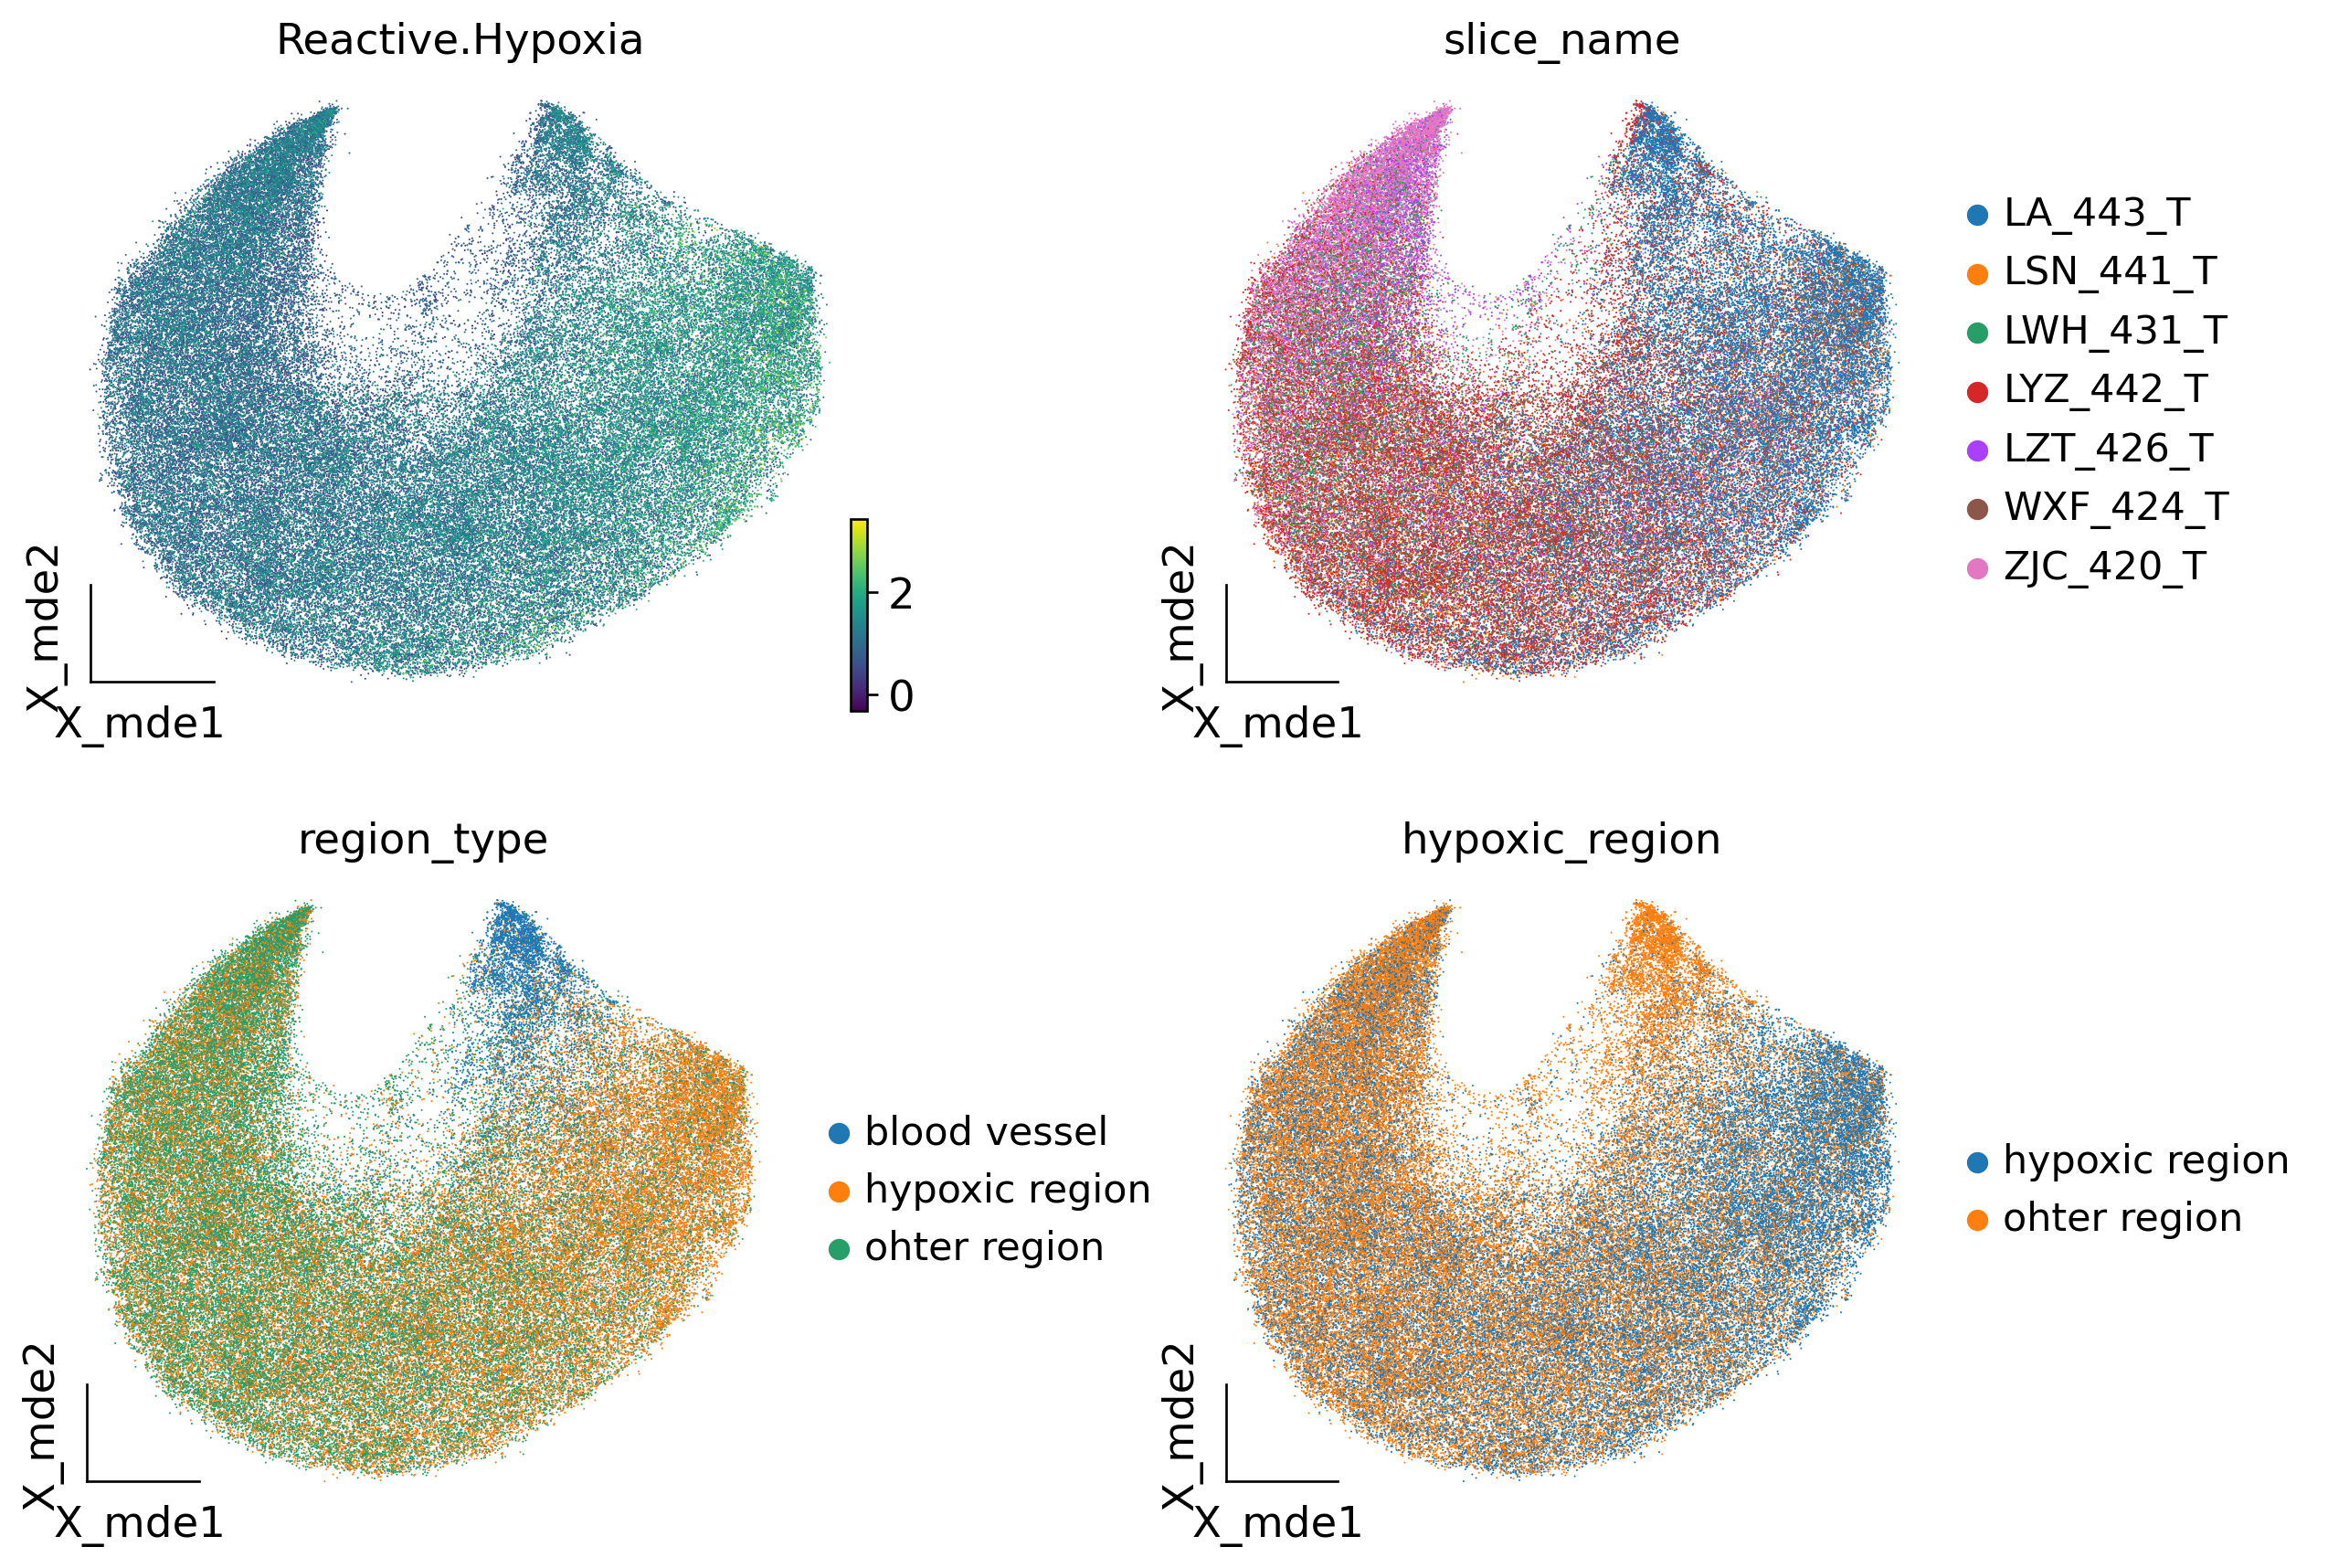

In [240]:
ov.utils.embedding(adata_concat,
                basis='X_mde',
                color=['Reactive.Hypoxia','slice_name','region_type', 'hypoxic_region'],
                frameon='small',size=1.5,ncols=2,wspace=0.4)

In [214]:
adata_concat.obs['hypoxic_region']

86543591021850_LA       ohter region
98569499449500_LYZ      ohter region
68504728389850_LYZ      ohter region
42734924602250_ZJC    hypoxic region
51324859193850_ZJC      ohter region
                           ...      
46170898439450_ZJC    hypoxic region
90409061588500_LA     hypoxic region
39298950765150_ZJC      ohter region
69578470212350_LYZ    hypoxic region
38439957314800_LA       ohter region
Name: hypoxic_region, Length: 101944, dtype: category
Categories (2, object): ['hypoxic region', 'ohter region']

loading adata:AnnData object with n_obs × n_vars = 101944 × 13472
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'x', 'y', 'nCount_SCT', 'nFeature_SCT', 'first_type', 'slice_name', 'batch_name', 'Reactive.Hypoxia', 'leiden', 'Anti.inflammatory.Macrophage', 'B', 'Cancer.cell', 'DC', 'Disease.Asscociated.Microglia', 'Endothelial', 'Homeostatic.Microglia', 'Hypoxic.Macrophage', 'Mast', 'Monocyte', 'Mural.cell', 'Neutrophil', 'NK', 'oligodendrocyte', 'pre.active.Microglia', 'T', 'region_type', 'hypoxic_region'
    var: 'n_cells'
    uns: 'slice_name_colors', 'log1p'
    obsm: 'X_pca', 'spatial', 'STAligner', 'X_mde'
finish preprocess
... Fold change threshold: 0.35562282096888786


<AxesSubplot: title={'center': 'GO Biological Process enrichment'}, xlabel='Fractions of genes'>

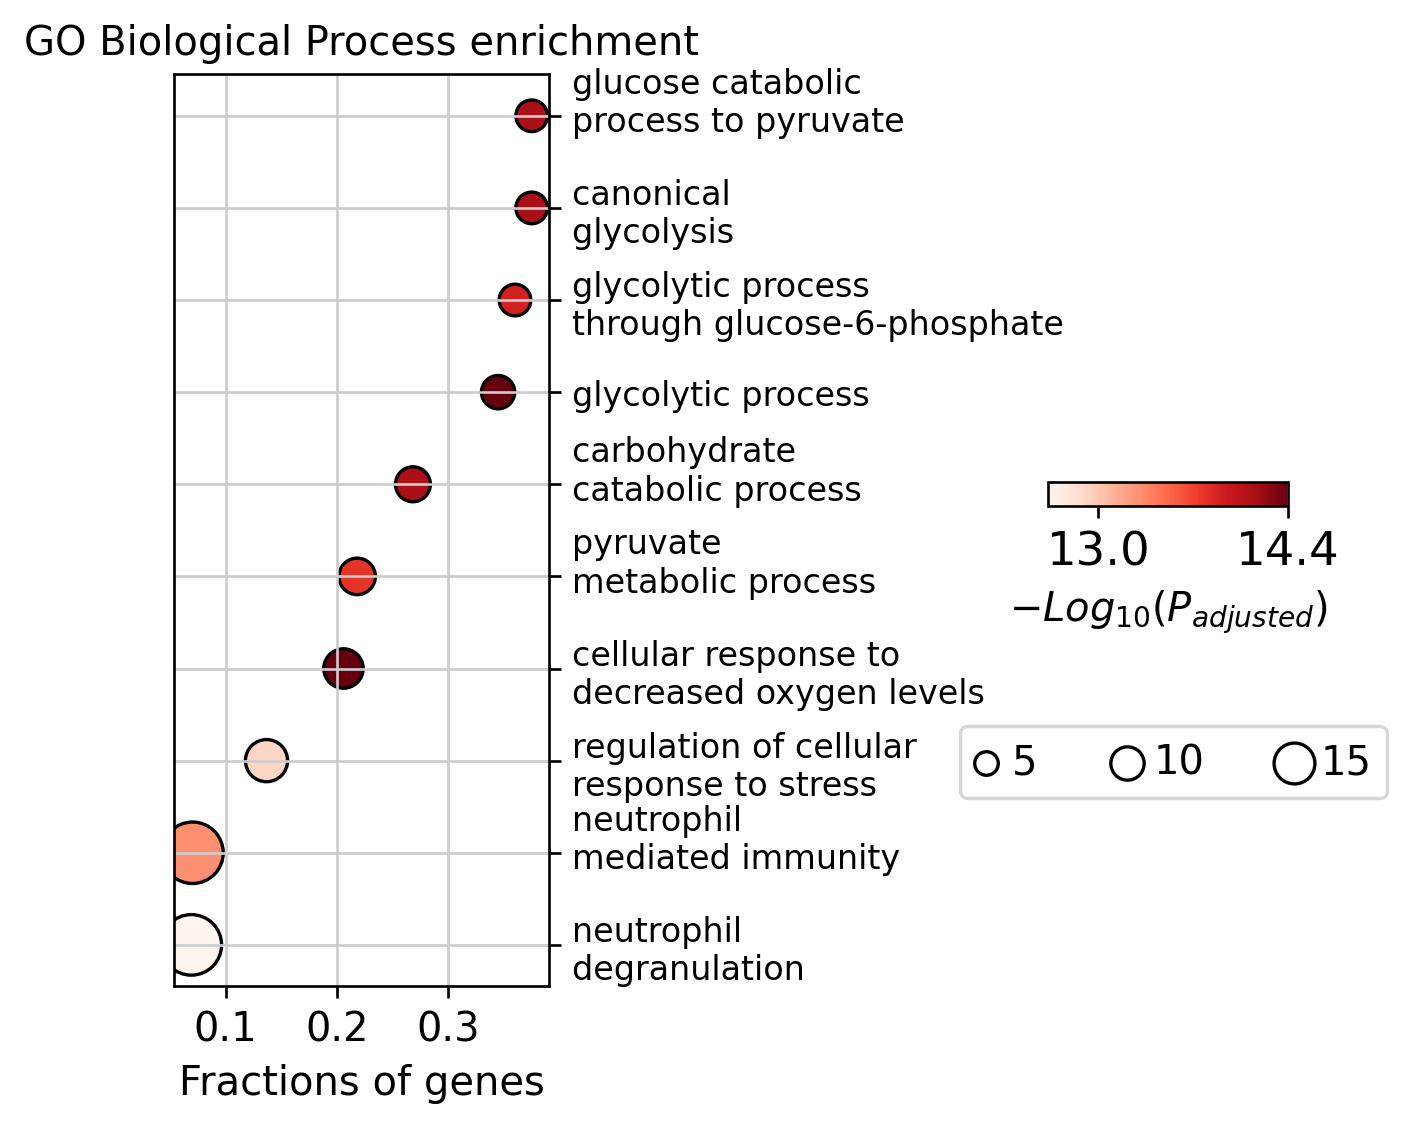

In [234]:
LSN_raw = adata_concat.copy()
sc.pp.filter_genes(LSN_raw, min_cells=round(len(LSN_raw.obs_names)*0.01)) # 过滤表达量<1%细胞的gene
sc.pp.normalize_total(LSN_raw, target_sum=1e4)
sc.pp.log1p(LSN_raw)


print(f'loading adata:{LSN_raw}')
# DEG Calculation
dds=ov.bulk.pyDEG(LSN_raw.to_df().T)
treatment_groups=LSN_raw[LSN_raw.obs['hypoxic_region']=='hypoxic region'].obs_names.tolist()
control_groups=LSN_raw[LSN_raw.obs['hypoxic_region']!='hypoxic region'].obs_names.tolist()
#sc.pp.scale(LSN_raw)

print('finish preprocess')
result=dds.deg_analysis(treatment_groups,control_groups,method='wilcox')
# -1 means automatically calculates
dds.foldchange_set(fc_threshold=-1,
                   pval_threshold=0.05,
                   logp_max=100)

# plot
pathway_dict=ov.utils.geneset_prepare('/storage/zengjianyangLab/hulei/GBM/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
deg_genes = dds.result.loc[(dds.result['sig']!='normal')&(dds.result['log2FC']>0.1)].index.tolist() #只富集高表达的基因
deg_genes_LSN = deg_genes
enr=ov.bulk.geneset_enrichment(gene_list=deg_genes,
                                pathways_dict=pathway_dict,
                                pvalue_type='auto',
                                organism='Human')
ov.bulk.geneset_plot(enr,figsize=(2,5),fig_title='GO Biological Process enrichment',custom_ticks=[13,14.4],
                        cmap='Reds')

(<Figure size 960x960 with 1 Axes>,
 <AxesSubplot: title={'center': 'DEG Analysis'}, xlabel='$log_{2}FC$', ylabel='$-log_{10}(qvalue)$'>)

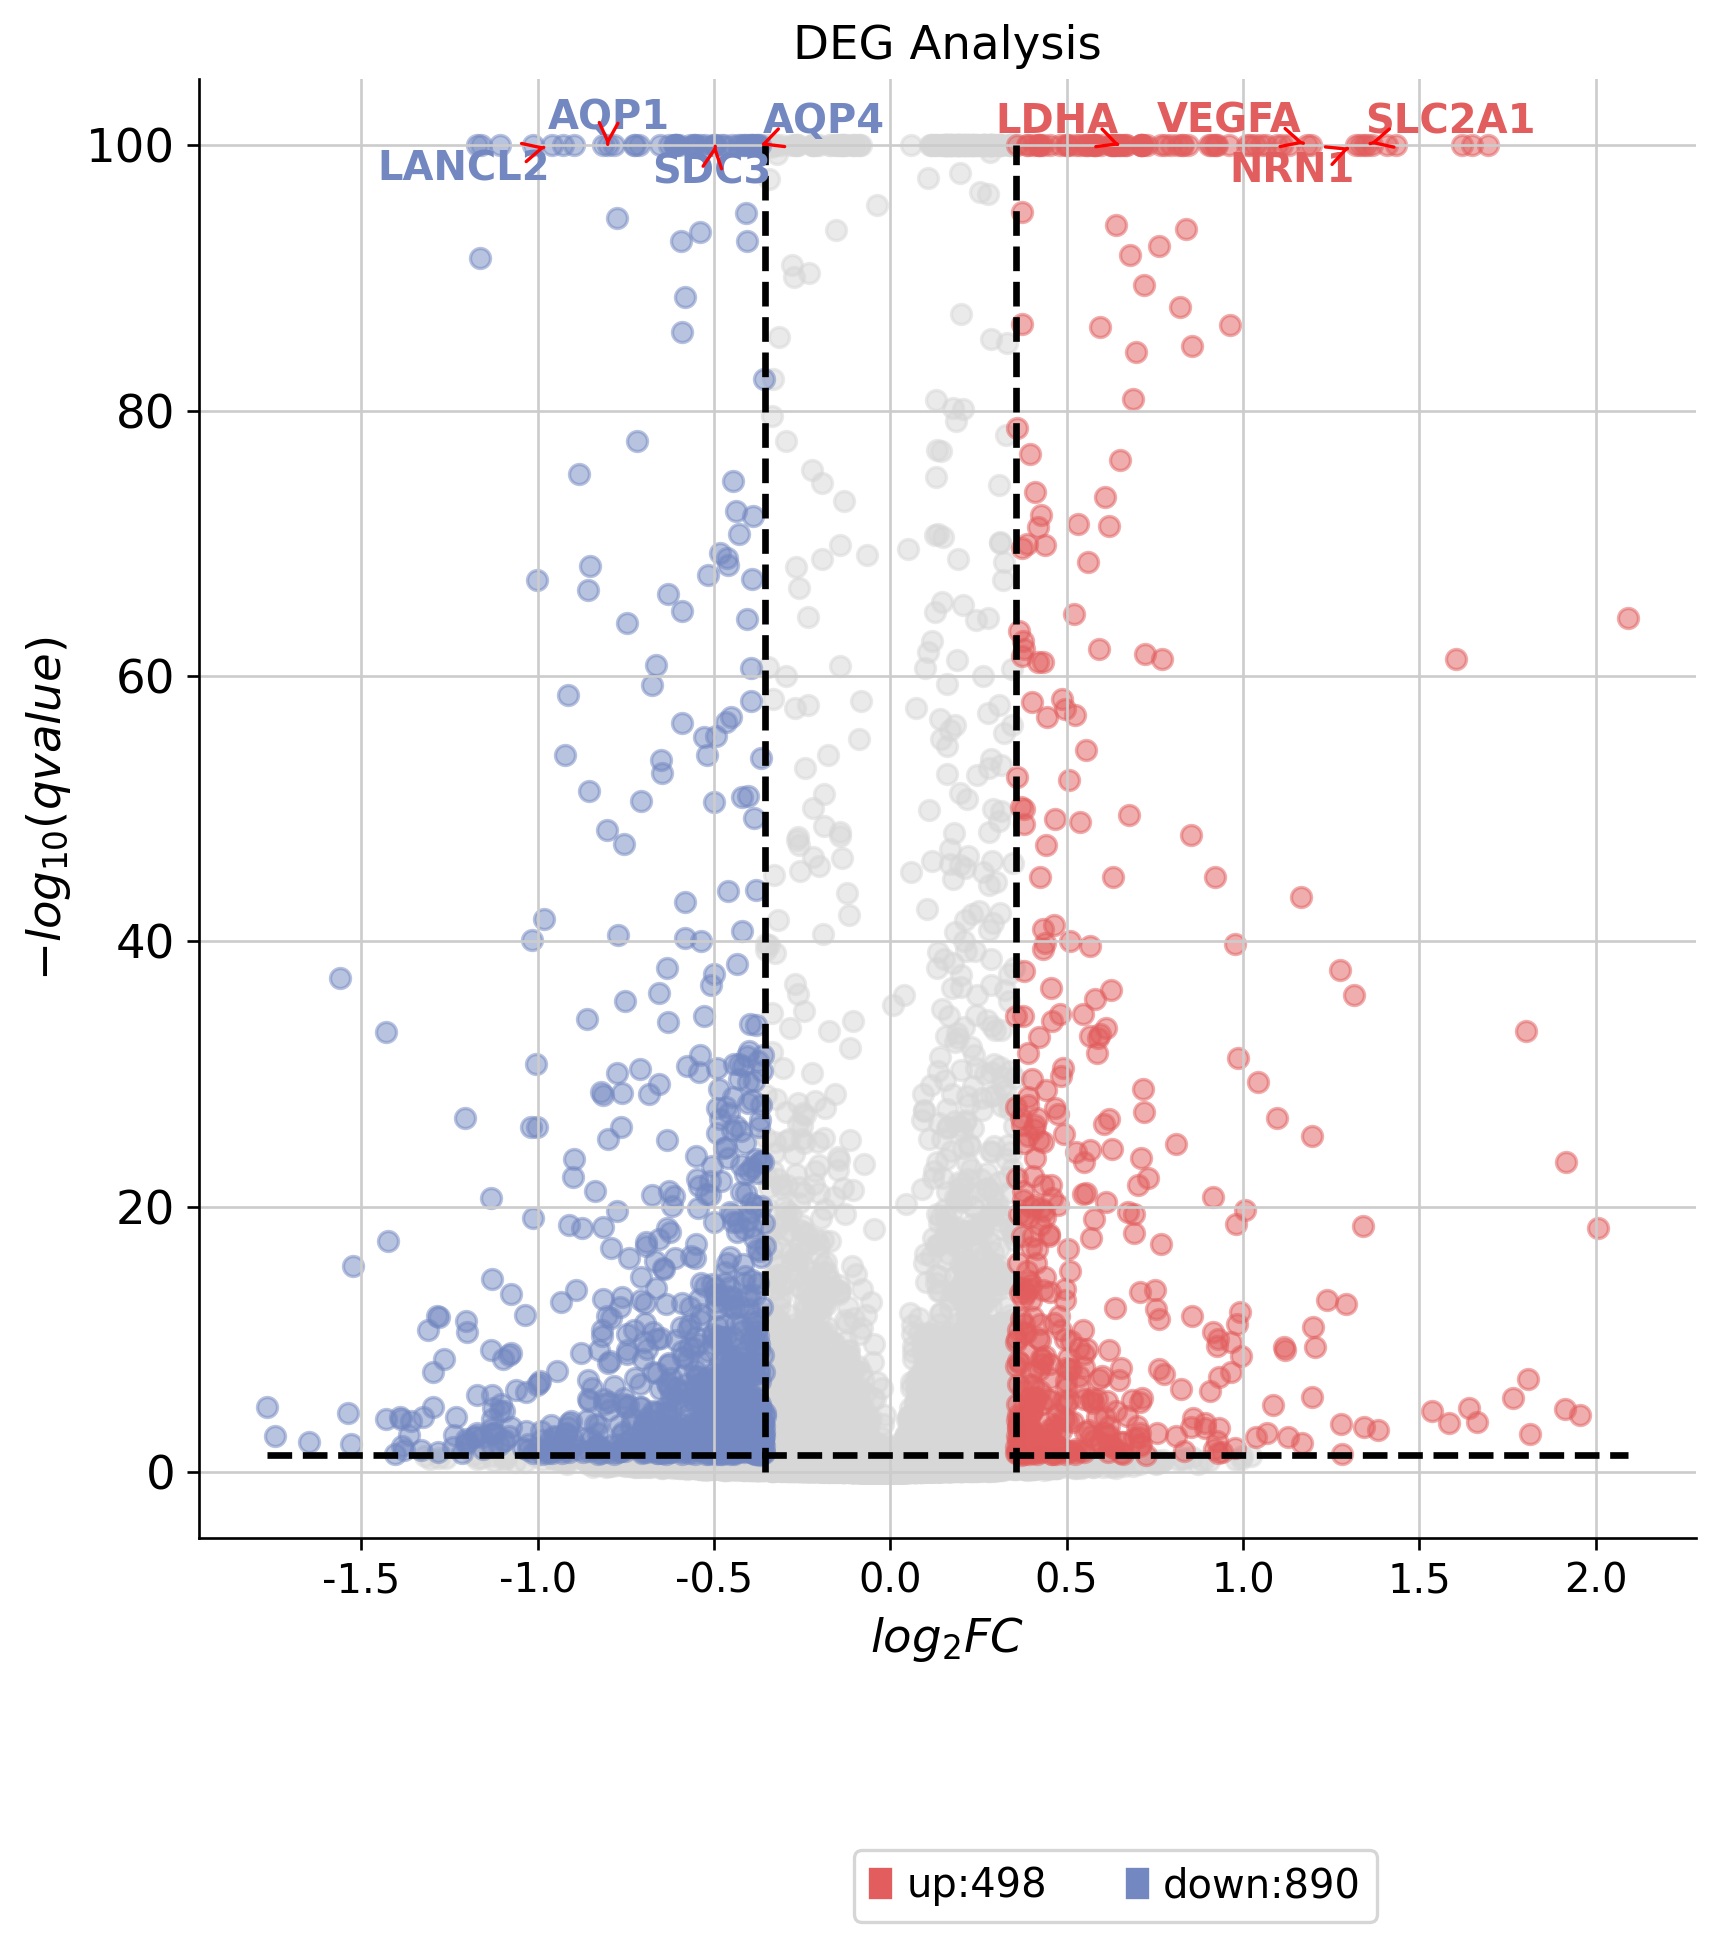

In [235]:
dds.plot_volcano(title='DEG Analysis',figsize=(8,8),
                 plot_genes_num=8,plot_genes_fontsize=12,)